# 0. 算法参考
- 图论中的算法基本都是提出后经过检验的。
- 本着不花时间去重复别人优秀工作的原则，本文中很多部分引用了别人的工作,甚至是照搬过来，因为我觉得算法这东西已经类似真理。

[传送门](https://www.cnblogs.com/wushaogui/p/9237445.html)

In [1]:
# 导入相应的包
import networkx as nx 
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt 
from networkx.drawing.nx_pydot import to_pydot 
from matplotlib.font_manager import *

# 定义自定义字体，文件名从1.b查看系统中文字体中来 
myfont = FontProperties(fname='/Library/fonts/Songti.ttc')   
# 解决负号'-'显示为方块的问题   
matplotlib.rcParams['axes.unicode_minus']=False

# 1. 最短路问题

## 1.1 无向图

/anaconda3/envs/tensorflow/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


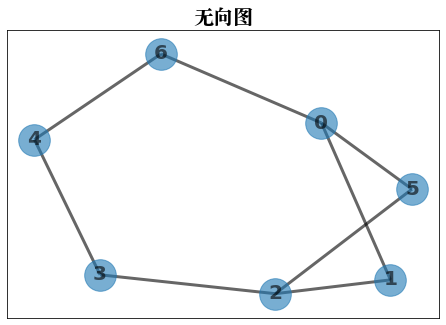

0节点到4节点最短路径:  [0, 6, 4]
0节点到所有节点最短路径:  {0: [0], 1: [0, 1], 5: [0, 5], 6: [0, 6], 2: [0, 1, 2], 4: [0, 6, 4], 3: [0, 1, 2, 3]}
计算图中节点0到节点2的所有最短路径:  [[0, 1, 2], [0, 5, 2]]
节点0到节点2的最短路径长度: 2  平均最短路径长度:  1.8095238095238095
检测节点0到节点2是否有路径 True


In [6]:
# 定义并画出该图 
G = nx.path_graph(5) 
nx.add_path(G, [0,5,2]) 
nx.add_path(G, [0,6,4]) 
nx.draw(G, with_labels=True, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('无向图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 计算最短路径 
print('0节点到4节点最短路径: ', nx.shortest_path(G, source=0, target=4)) 
p1 = nx.shortest_path(G, source=0) 
print('0节点到所有节点最短路径: ', p1) 
 
# 计算图中所有的最短路径 
print('计算图中节点0到节点2的所有最短路径: ', [p for p in nx.all_shortest_paths(G, source=0, target=2)]) 
 
#计算最短路径长度 
p2 = nx.shortest_path_length(G, source=0, target=2)  #最短路径长度 
p3 = nx.average_shortest_path_length(G) #计算平均最短路径长度 
print('节点0到节点2的最短路径长度:', p2, ' 平均最短路径长度: ', p3) 
 
# 检测是否有路径
print('检测节点0到节点2是否有路径',nx.has_path(G,0,2))

## 1.2 无权图

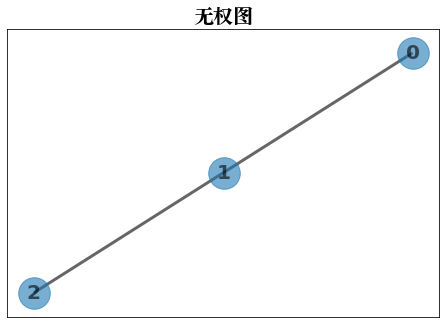

当前源与所有可达节点的最短路径:  {0: [0], 1: [0, 1], 2: [0, 1, 2]} 
当前源与所有可达节点的最短路径的长度:  {0: 0, 1: 1, 2: 2}

graph两两节点之间的最短路径:  {0: {0: [0], 1: [0, 1], 2: [0, 1, 2]}, 1: {1: [1], 0: [1, 0], 2: [1, 2]}, 2: {2: [2], 1: [2, 1], 0: [2, 1, 0]}} 
graph两两节点之间的最短路径的长度:  {0: {0: 0, 1: 1, 2: 2}, 1: {1: 0, 0: 1, 2: 1}, 2: {2: 0, 1: 1, 0: 2}}

G中从源到所有节点最短路径的前驱:  {0: [], 1: [0], 2: [1]}


In [7]:
G = nx.path_graph(3) 
nx.draw(G, with_labels=True, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('无权图',fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
path1 = nx.single_source_shortest_path(G, 0)  # 计算当前源与所有可达节点的最短路径 
length1 = nx.single_source_shortest_path_length(G, 0) # 计算当前源与所有可达节点的最短路径的长度 
path2 = dict(nx.all_pairs_shortest_path(G))   # 计算graph两两节点之间的最短路径 
length2 = dict(nx.all_pairs_shortest_path_length(G)) #计算graph两两节点之间的最短路径的长度 
prede1 = nx.predecessor(G, 0)                 # 返回G中从源到所有节点最短路径的前驱 
 
print('当前源与所有可达节点的最短路径: ', path1, '\n当前源与所有可达节点的最短路径的长度: ', length1) 
print('\ngraph两两节点之间的最短路径: ', path2, '\ngraph两两节点之间的最短路径的长度: ', length2) 
print('\nG中从源到所有节点最短路径的前驱: ', prede1) 

## 1.3 有向图

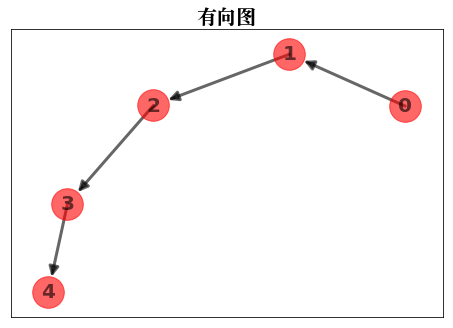


加权图最短路径前驱和长度:  {0: [], 1: [0], 2: [1], 3: [2], 4: [3]} {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

G中从源0到目标4的最短加权路径:  [0, 1, 2, 3, 4]

G中从源0到目标4的最短加权路径的长度:  4

单源节点最短加权长度和路径:  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4} {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}

多源节点最短加权路径和长度: {0: [0], 4: [4], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3]} {0: 0, 4: 0, 1: 1, 2: 2, 3: 3}

两两节点之间最短加权路径和长度:  {0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}, 1: {1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]}, 2: {2: [2], 3: [2, 3], 4: [2, 3, 4]}, 3: {3: [3], 4: [3, 4]}, 4: {4: [4]}} {0: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 1: {1: 0, 2: 1, 3: 2, 4: 3}, 2: {2: 0, 3: 1, 4: 2}, 3: {3: 0, 4: 1}, 4: {4: 0}}

双向搜索的迪杰斯特拉: 4 [0, 1, 2, 3, 4]


In [45]:
G = nx.path_graph(5, create_using = nx.DiGraph())   
nx.draw(G, with_labels=True, arrowsize=20, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('有向图',fontproperties=myfont, fontsize=20)  
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 计算加权图最短路径前驱和长度 
pred, dist = nx.dijkstra_predecessor_and_distance(G, 0) 
print('\n加权图最短路径前驱和长度: ', pred, dist) 
 
# 返回G中从源到目标的最短加权路径,要求边权重必须为数值 
print('\nG中从源0到目标4的最短加权路径: ', nx.dijkstra_path(G,0,4)) 
print('\nG中从源0到目标4的最短加权路径的长度: ', nx.dijkstra_path_length(G,0,4))  #最短路径长度 
 
# 单源节点最短加权长度和路径 
length1, path1 = nx.single_source_dijkstra(G, 0) 
print('\n单源节点最短加权长度和路径: ', length1, path1) 
# 下面两条和是前面的分解 
# path2=nx.single_source_dijkstra_path(G,0) 
# length2 = nx.single_source_dijkstra_path_length(G, 0) 
# print(length1,'$', path1,'$',length2,'$',path2) 
 
# 多源节点最短加权路径和长度。 
path1 = nx.multi_source_dijkstra_path(G, {0, 4}) 
length1 = nx.multi_source_dijkstra_path_length(G, {0, 4}) 
 
print('\n多源节点最短加权路径和长度:', path1, length1) 
 
# 两两节点之间最短加权路径和长度。 
path1 = dict(nx.all_pairs_dijkstra_path(G)) 
length1 = dict(nx.all_pairs_dijkstra_path_length(G)) 
print('\n两两节点之间最短加权路径和长度: ', path1, length1) 
 
# 双向搜索的迪杰斯特拉 
length, path = nx.bidirectional_dijkstra(G, 0, 4) 
print('\n双向搜索的迪杰斯特拉:', length, path) 

## 1.4 Bellman-Ford Algorithm

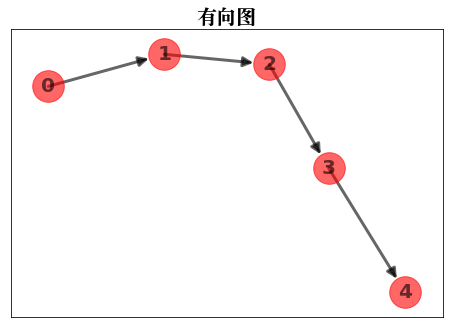

G中从源到目标的最短加权路径:  [0, 1, 2, 3, 4]

G中从源到目标的最短加权路径的长度: 4

单源节点最短加权路径和长度:  {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]} 
单源节点最短加权路径和长度:  {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

两两节点之间最短加权路径和长度:  {0: {0: [0], 1: [0, 1], 2: [0, 1, 2], 3: [0, 1, 2, 3], 4: [0, 1, 2, 3, 4]}, 1: {1: [1], 2: [1, 2], 3: [1, 2, 3], 4: [1, 2, 3, 4]}, 2: {2: [2], 3: [2, 3], 4: [2, 3, 4]}, 3: {3: [3], 4: [3, 4]}, 4: {4: [4]}} {0: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}, 1: {1: 0, 2: 1, 3: 2, 4: 3}, 2: {2: 0, 3: 1, 4: 2}, 3: {3: 0, 4: 1}, 4: {4: 0}}

加权图最短路径长度和前驱:  {0: [], 1: [0], 2: [1], 3: [2], 4: [3]} {0: 0, 1: 1, 2: 2, 3: 3, 4: 4}


In [42]:
G = nx.path_graph(5, create_using = nx.DiGraph())   
nx.draw(G, with_labels=True, arrowsize=20, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('有向图',fontproperties=myfont, fontsize=20)  
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
print('G中从源到目标的最短加权路径: ', nx.bellman_ford_path(G, 0, 4)) 
print('\nG中从源到目标的最短加权路径的长度:', nx.bellman_ford_path_length(G, 0, 4)) 
 
path1=nx.single_source_bellman_ford_path(G, 0) 
length1 = dict(nx.single_source_bellman_ford_path_length(G, 0)) 
print('\n单源节点最短加权路径和长度: ', path1, '\n单源节点最短加权路径和长度: ', length1) 
 
path2 = dict(nx.all_pairs_bellman_ford_path(G)) 
length2 = dict(nx.all_pairs_bellman_ford_path_length(G)) 
print('\n两两节点之间最短加权路径和长度: ', path2, length2) 
 
length, path = nx.single_source_bellman_ford(G, 0) 
pred, dist = nx.bellman_ford_predecessor_and_distance(G, 0) 
print('\n加权图最短路径长度和前驱: ', pred, dist) 

## 1.5 检测负边权重

In [30]:
# 定义并画出该图 
G = nx.cycle_graph(5, create_using=nx.DiGraph()) 
 
# 添加负权重边前后 
print(nx.negative_edge_cycle(G)) 
G[1][2]['weight'] = -7 
print(nx.negative_edge_cycle(G))

False
True


## 1.6 Johnson Algorithm

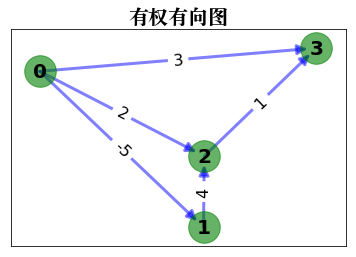

各个节点出发的最短路径:  {'0': {'0': ['0'], '3': ['0', '1', '2', '3'], '1': ['0', '1'], '2': ['0', '1', '2']}, '3': {'3': ['3']}, '1': {'1': ['1'], '2': ['1', '2'], '3': ['1', '2', '3']}, '2': {'2': ['2'], '3': ['2', '3']}}


In [52]:
# 生成graph 
G = nx.DiGraph() 
G.add_weighted_edges_from([('0', '3', 3), ('0', '1', -5),('0', '2', 2), ('1', '2', 4), ('2', '3', 1)]) 
 
# 边和节点信息 
edge_labels = nx.get_edge_attributes(G, 'weight')  
labels={'0': '0', '1': '1', '2': '2', '3': '3'} 
 
# 生成节点位置  
pos=nx.spring_layout(G)  
  
# 把节点画出来  
nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000, alpha=0.6)  
  
# 把边画出来  
nx.draw_networkx_edges(G, pos, width=3.0, arrowsize=20, alpha=0.5, edge_color='b')  
  
# 把节点的标签画出来  
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_weight='bold')  
  
# 把边权重画出来  
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16)  
 
# 显示graph 
plt.title('有权有向图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
#使用johnson算法计算最短路径 
paths = nx.johnson(G, weight='weight') 
 
print('各个节点出发的最短路径: ', paths) 

## 1.7 Floyd-Warshall Algorithm

In [1]:
# 使用Floyd算法找到所有对最短路径长度。 
G = nx.DiGraph() 
G.add_weighted_edges_from([('0', '3', 3), ('0', '1', -5),('0', '2', 2), ('1', '2', 4), ('2', '3', 1)]) 

# 边和节点信息 
edge_labels = nx.get_edge_attributes(G,'weight')  
labels={'0': '0', '1': '1', '2': '2', '3': '3'} 
 
# 生成节点位置  
pos=nx.spring_layout(G)  
  
# 把节点画出来  
nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000, alpha=0.6)  
  
# 把边画出来  
nx.draw_networkx_edges(G, pos, width=3.0, arrowsize=20, alpha=0.5, edge_color='b')  
  
# 把节点的标签画出来  
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_weight='bold')  
  
# 把边权重画出来  
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16)  
 
# 显示graph 
plt.title('有权图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 计算最短路径长度 
lenght=nx.floyd_warshall(G, weight='weight') 
 
# 计算最短路径上的前驱与路径长度 
predecessor, distance1=nx.floyd_warshall_predecessor_and_distance(G, weight='weight') 
 
# 计算两两节点之间的最短距离,并以numpy矩阵形式返回 
distance2=nx.floyd_warshall_numpy(G, weight='weight') 
 
print(list(lenght)) 
print(predecessor) 
print(list(distance1)) 
print(distance2) 

NameError: name 'nx' is not defined

## 1.8 A* Algorithm

In [2]:
G = nx.path_graph(5) 

# 显示graph 
nx.draw(G, with_labels=True, arrowsize=20, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('有x向图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 直接输出路径和长度 
print(nx.astar_path(G, 0, 4)) 
print(nx.astar_path_length(G, 0, 4)) 

NameError: name 'nx' is not defined

# 2. 最小/大生成树问题

## 2.0 构建所需生成树的图

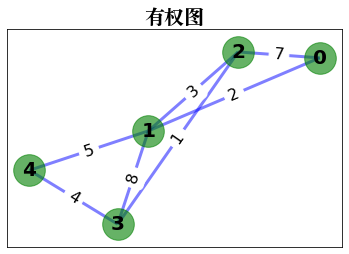

In [8]:
# 生成graph 
G.clear() 
G = nx.Graph() 
G.add_weighted_edges_from([('0', '1', 2), ('0', '2', 7), ('1', '2', 3), 
                           ('1', '3', 8), ('1', '4', 5), ('2', '3', 1), ('3', '4', 4)]) 
 
# 边和节点信息 
edge_labels = nx.get_edge_attributes(G,'weight')  
labels={'0': '0', '1': '1', '2': '2', '3': '3', '4': '4'} 
 
# 生成节点位置  
pos=nx.spring_layout(G)  
  
# 把节点画出来  
nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000, alpha=0.6)  
  
# 把边画出来  
nx.draw_networkx_edges(G, pos, width=3.0, arrowsize=20, alpha=0.5, edge_color='b')  
  
# 把节点的标签画出来  
nx.draw_networkx_labels(G, pos, labels, font_size=20, font_weight='bold')  
  
# 把边权重画出来  
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16)  
 
# 显示graph 
plt.title('有权图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 

## 2.1 最小生成树

In [9]:
# 求得最小生成树,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
KA = nx.minimum_spanning_tree(G,algorithm='kruskal') 
print(KA.edges(data=True)) 
 
# 直接拿到构成最小生成树的边,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
mst = nx.minimum_spanning_edges(G, algorithm='kruskal', data=False) 
edgelist = list(mst) 
print(edgelist)

[('0', '1', {'weight': 2}), ('1', '2', {'weight': 3}), ('2', '3', {'weight': 1}), ('3', '4', {'weight': 4})]
[('2', '3'), ('0', '1'), ('1', '2'), ('3', '4')]


## 2.2最大生成树

In [10]:
# 返回无向图G上的最大生成树或森林。 
T = nx.maximum_spanning_tree(G) 
print(sorted(T.edges(data=True))) 
 
# 直接拿到构成最大生成树,algorithm可以是kruskal,prim,boruvka一种,默认是kruskal 
mst = nx.tree.maximum_spanning_edges(G, algorithm='kruskal', data=False) 
edgelist = list(mst) 
print(edgelist)

[('0', '2', {'weight': 7}), ('1', '2', {'weight': 3}), ('1', '3', {'weight': 8}), ('1', '4', {'weight': 5})]
[('1', '3'), ('0', '2'), ('1', '4'), ('1', '2')]


# 3 拓扑排序 (TSA)

/anaconda3/envs/tensorflow/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/anaconda3/envs/tensorflow/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


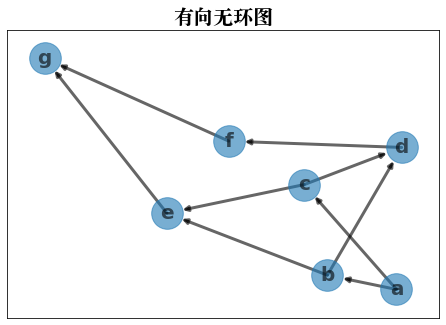

扑排序序列: ['a', 'c', 'b', 'd', 'f', 'e', 'g']
逆扑排序序列: ['g', 'e', 'f', 'd', 'b', 'c', 'a']


In [11]:
DG = nx.DiGraph([('a', 'b'), ('a', 'c'),('b', 'e'), ('b', 'd'),('c', 'e'), ('c', 'd'),('d', 'f'), ('f', 'g'), ('e', 'g')]) 
 
# 显示graph 
nx.draw_spring(DG, with_labels=True, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.title('有向无环图', fontproperties=myfont, fontsize=20) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 这个graph拓扑排序序列有很多,这里只给出一种 
print('扑排序序列:',list(nx.topological_sort(DG))) 
print('逆扑排序序列:',list(reversed(list(nx.topological_sort(DG))))) 

# 4. 最大流问题

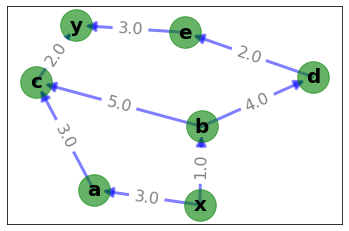

最大流值:  3.0
最大流流经途径:  {'x': {'a': 2.0, 'b': 1.0}, 'a': {'c': 2.0}, 'b': {'c': 0, 'd': 1.0}, 'c': {'y': 2.0}, 'd': {'e': 1.0}, 'e': {'y': 1.0}, 'y': {}}


In [18]:
# 构建graph 
G = nx.DiGraph() 
G.add_edge('x','a', capacity=3.0) 
G.add_edge('x','b', capacity=1.0) 
G.add_edge('a','c', capacity=3.0) 
G.add_edge('b','c', capacity=5.0) 
G.add_edge('b','d', capacity=4.0) 
G.add_edge('d','e', capacity=2.0) 
G.add_edge('c','y', capacity=2.0) 
G.add_edge('e','y', capacity=3.0) 

pos = nx.spring_layout(G)  
# 显示graph 
edge_labels = nx.get_edge_attributes(G,'capacity') 
nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000, alpha=0.6) 
nx.draw_networkx_labels(G, pos, font_size=20, font_weight='bold') 
nx.draw_networkx_edges(G, pos, width=3.0, arrowsize=20, alpha=0.5, edge_color='b') 
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16, alpha=0.5) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 求最大流 
flow_value, flow_dict = nx.maximum_flow(G, 'x', 'y') 
print("最大流值: ", flow_value) 
print("最大流流经途径: ", flow_dict) 

# 5 最小费用最大流问题

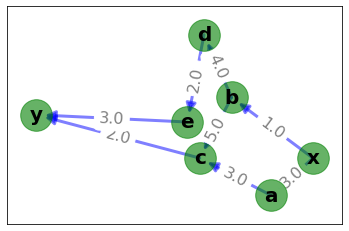

最小费用最大流流经途径:  {'x': {'a': 2.0, 'b': 1.0}, 'a': {'c': 2.0}, 'b': {'c': 0, 'd': 1.0}, 'c': {'y': 2.0}, 'd': {'e': 1.0}, 'e': {'y': 1.0}, 'y': {}}


In [15]:
# 构建graph 
G = nx.DiGraph() 
G.add_edge('x','a', capacity=3.0, weight=13) 
G.add_edge('x','b', capacity=1.0, weight=5) 
G.add_edge('a','c', capacity=3.0, weight=14) 
G.add_edge('b','c', capacity=5.0, weight=23) 
G.add_edge('b','d', capacity=4.0, weight=18) 
G.add_edge('d','e', capacity=2.0, weight=9) 
G.add_edge('c','y', capacity=2.0, weight=10) 
G.add_edge('e','y', capacity=3.0, weight=14) 

pos = nx.spring_layout(G)  
# 显示graph 
edge_labels = nx.get_edge_attributes(G, 'capacity')
nx.draw_networkx_nodes(G, pos, node_color='g', node_size=1000, alpha=0.6) 
nx.draw_networkx_labels(G, pos, font_size=20, font_weight='bold') 
nx.draw_networkx_edges(G, pos, width=3.0, arrowsize=20, alpha=0.5, edge_color='b') 
nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=16, alpha=0.5) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 求最大流 
flow_dict = nx.max_flow_min_cost(G, 'x', 'y')
print("最小费用最大流流经途径: ", flow_dict) 

# 6 搜索算法

## 6.1 广度优先搜索算法(BFS)

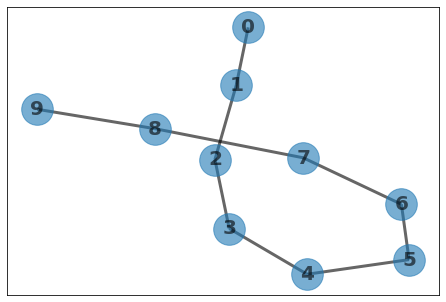

[4, 3, 5, 2, 6, 1, 7, 0, 8, 9]


In [19]:
# 构建一个长度为10的路径 
G = nx.path_graph(10) 
 
# 显示graph 
nx.draw_spring(G, with_labels=True, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 以4为顶点,广度遍历 
print(list(nx.bfs_tree(G,4))) 

## 6.2 深度搜索算法(DFS)

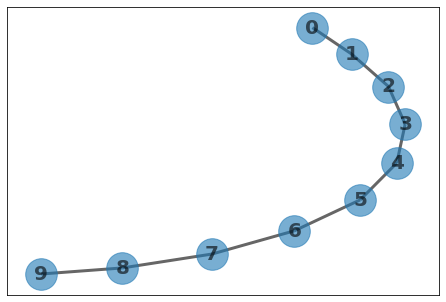

[5, 4, 3, 2, 6, 7, 8]

In [20]:
# 构建一个长度为10的路径 
G = nx.path_graph(10) 
 
# 显示graph 
nx.draw_spring(G, with_labels=True, node_size=1000, font_size=20, font_weight='bold', width=3, alpha=0.6) 
plt.axis('on') 
plt.xticks([]) 
plt.yticks([]) 
plt.show() 
 
# 以5为顶点,深度遍历,限定深度为3 
T = nx.dfs_tree(G, source=5, depth_limit=3) 
list(T) 